In [1]:
#Importamos las librerias 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score

In [2]:
data_wine = pd.read_csv('C:\AD_TASK3\Desiciontree\winequality_red.csv')
data_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
data_wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [8]:
data_wine.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

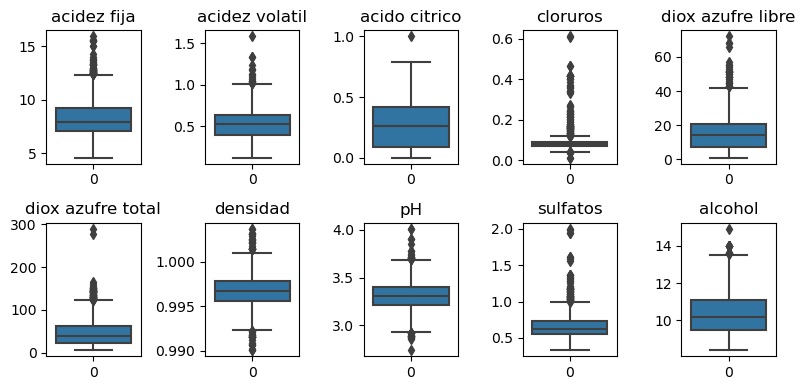

In [13]:
#Se realiza deteccion de datos atípicos
fig, axs = plt.subplots(2,5, figsize = (8,4))
plt1 = sns.boxplot(data_wine['fixed acidity'], ax = axs[0,0])
plt2 = sns.boxplot(data_wine['volatile acidity'], ax = axs[0,1])
plt3 = sns.boxplot(data_wine['citric acid'], ax = axs[0,2])
plt4 = sns.boxplot(data_wine['chlorides'], ax = axs[0,3])
plt5 = sns.boxplot(data_wine['free sulfur dioxide'], ax = axs[0,4])
plt6 = sns.boxplot(data_wine['total sulfur dioxide'], ax = axs[1,0])
plt7 = sns.boxplot(data_wine['density'], ax = axs[1,1])
plt8 = sns.boxplot(data_wine['pH'], ax = axs[1,2])
plt9 = sns.boxplot(data_wine['sulphates'], ax = axs[1,3])
plt10 = sns.boxplot(data_wine['alcohol'], ax = axs[1,4])

#plt.title('Identificación de Datos Faltantes y Atípicos', fontsize=10 )
plt1.set_title('acidez fija')
plt2.set_title('acidez volatil')
plt3.set_title('acido citrico')
plt4.set_title('cloruros')
plt5.set_title('diox azufre libre')
plt6.set_title('diox azufre total')
plt7.set_title('densidad')
plt8.set_title('pH')
plt9.set_title('sulfatos')
plt10.set_title('alcohol')
plt.tight_layout()

In [14]:
data_wine.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


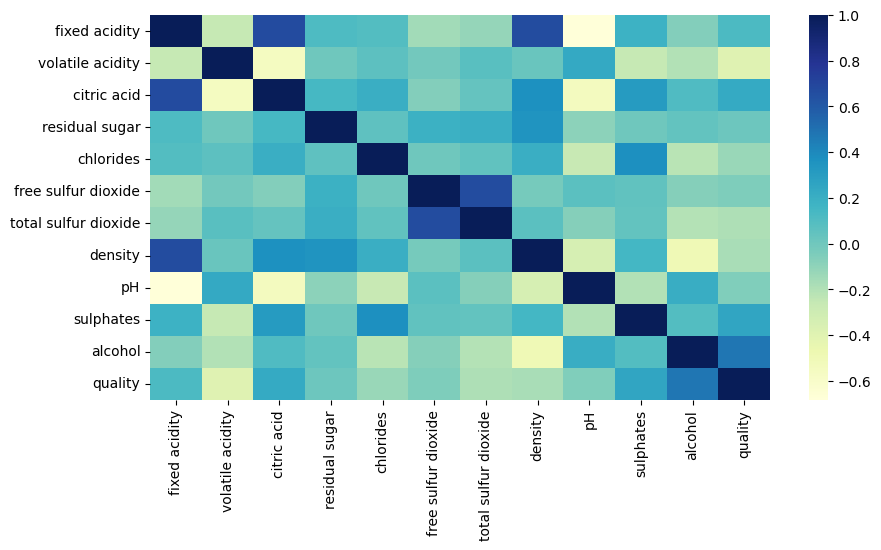

In [20]:
plt.figure(figsize = (10, 5))
sns.heatmap(data_wine.corr(), annot = False, cmap="YlGnBu")
plt.show()

In [72]:
# Porcentaje de datos para entrenamiento (train) = 75% , y para prueba (test) = 25%

# Se crean variables X y Y para almacenar la información del entrenamiento

X = data_wine.drop('quality',axis=1) # Se cargan los datos de train sin los datos de calidad de vino
Y = data_wine['quality'] # Se cargan los datos de train con los datos de calidad de vino

#La función train_test_split crea una división de un conjunto de datos en dos bloques uno de entrenamiento y otro de prueba (train and test)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, stratify=Y, random_state= 0)

In [73]:
# Verificamos la distribución de clases en Y_train y Y_test
print("Distribución de clases en Y_train:")
print(Y_train.value_counts())
print("\nDistribución de clases en Y_test:")
print(Y_test.value_counts())

Distribución de clases en Y_train:
quality
5    511
6    478
7    149
4     40
8     13
3      8
Name: count, dtype: int64

Distribución de clases en Y_test:
quality
5    170
6    160
7     50
4     13
8      5
3      2
Name: count, dtype: int64


In [74]:
# Construir el modelo de arbol de decision
tree = DecisionTreeClassifier()

In [75]:
arbol = tree.fit(X_train, Y_train)

[Text(0.4522925456240188, 0.975, 'x[10] <= 10.15\ngini = 0.643\nsamples = 1199\nvalue = [8, 40, 511, 478, 149, 13]'),
 Text(0.2644843995290424, 0.925, 'x[6] <= 62.5\ngini = 0.518\nsamples = 600\nvalue = [5, 24, 377, 175, 17, 2]'),
 Text(0.14935733908948196, 0.875, 'x[9] <= 0.575\ngini = 0.581\nsamples = 377\nvalue = [5, 18, 205, 130, 17, 2]'),
 Text(0.05121664050235479, 0.825, 'x[0] <= 7.65\ngini = 0.475\nsamples = 153\nvalue = [2, 14, 106, 29, 2, 0]'),
 Text(0.0141287284144427, 0.775, 'x[10] <= 9.075\ngini = 0.305\nsamples = 64\nvalue = [2, 5, 53, 3, 1, 0]'),
 Text(0.006279434850863423, 0.725, 'x[8] <= 3.435\ngini = 0.375\nsamples = 4\nvalue = [0, 3, 1, 0, 0, 0]'),
 Text(0.0031397174254317113, 0.675, 'gini = 0.0\nsamples = 3\nvalue = [0, 3, 0, 0, 0, 0]'),
 Text(0.009419152276295133, 0.675, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1, 0, 0, 0]'),
 Text(0.02197802197802198, 0.725, 'x[3] <= 1.3\ngini = 0.244\nsamples = 60\nvalue = [2, 2, 52, 3, 1, 0]'),
 Text(0.015698587127158554, 0.675, 

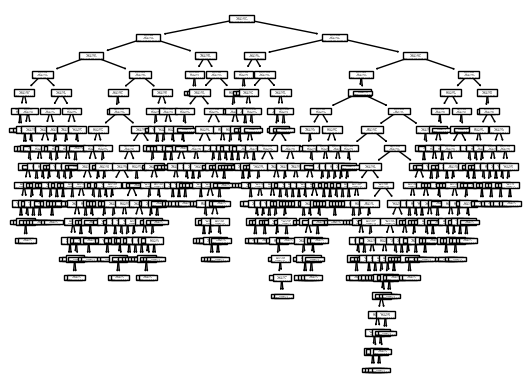

In [76]:
plot_tree(arbol)

In [77]:
predicciones = arbol.predict(X_test)

In [78]:
predicciones

array([7, 5, 6, 6, 6, 7, 6, 7, 6, 6, 5, 5, 5, 5, 6, 5, 6, 5, 5, 5, 5, 5,
       6, 5, 7, 5, 4, 7, 6, 7, 6, 5, 7, 5, 5, 6, 6, 5, 7, 6, 5, 5, 5, 6,
       6, 5, 5, 7, 5, 6, 7, 5, 5, 7, 6, 6, 5, 5, 6, 6, 5, 6, 6, 5, 5, 7,
       6, 6, 5, 7, 7, 7, 6, 7, 5, 6, 5, 5, 5, 7, 6, 6, 7, 7, 7, 5, 7, 5,
       5, 6, 7, 6, 5, 4, 6, 5, 5, 4, 6, 5, 7, 6, 5, 7, 5, 7, 3, 4, 7, 6,
       5, 5, 7, 5, 6, 5, 5, 5, 6, 6, 5, 7, 6, 7, 6, 5, 7, 5, 5, 6, 6, 6,
       5, 6, 7, 5, 5, 5, 5, 5, 7, 6, 6, 5, 5, 6, 6, 5, 6, 6, 6, 6, 6, 7,
       7, 6, 5, 6, 5, 6, 6, 6, 6, 5, 7, 6, 6, 6, 7, 5, 6, 5, 5, 6, 6, 5,
       6, 6, 5, 5, 8, 5, 5, 6, 5, 6, 5, 6, 6, 6, 6, 6, 3, 4, 6, 6, 5, 6,
       5, 6, 5, 5, 6, 4, 6, 6, 5, 6, 6, 5, 6, 5, 6, 5, 5, 5, 6, 6, 5, 5,
       5, 7, 6, 5, 6, 5, 5, 5, 5, 6, 5, 5, 5, 6, 6, 5, 5, 6, 5, 6, 7, 4,
       7, 4, 6, 6, 5, 8, 6, 5, 6, 6, 5, 6, 7, 6, 5, 7, 6, 6, 6, 5, 6, 5,
       7, 5, 7, 6, 6, 5, 7, 7, 5, 6, 3, 5, 5, 6, 7, 7, 5, 5, 6, 5, 5, 6,
       5, 5, 6, 6, 5, 5, 6, 5, 5, 6, 5, 5, 5, 5, 6,

In [79]:
# Examinamos la matriz de confusión
pd.crosstab(np.array(Y_test), predicciones, rownames=['Actual'], colnames=['Predicciones'])

Predicciones,3,4,5,6,7,8
Actual,,,,,,
3,0,1,0,1,0,0
4,1,0,2,9,1,0
5,3,8,119,36,4,0
6,0,1,35,96,24,4
7,0,0,2,17,30,1
8,0,0,1,1,3,0


In [80]:
accuracy = accuracy_score(Y_test,predicciones)
accuracy

0.6125